In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# First, I have to laod different modules that I use for analyzing the data and for plotting:
import sys, os, collections
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt; plt.rcdefaults()
import re
from matplotlib.pyplot import figure
from collections import Counter

# Second, I have to load the Text Fabric app
from tf.fabric import Fabric
from tf.app import use

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
%time
BHSa2021 = use('etcbc/bhsa', version="2021", mod='CenterBLC/BHSaddons/tf')
BHSa4c = use('etcbc/bhsa', version="c", mod='CenterBLC/BHSaddons/tf')
DSS = use('etcbc/dss', hoist=globals())

Wall time: 0 ns


This is Text-Fabric 10.0.3
Api reference : https://annotation.github.io/text-fabric/tf/cheatsheet.html

131 features found and 1 ignored


This is Text-Fabric 10.0.3
Api reference : https://annotation.github.io/text-fabric/tf/cheatsheet.html

129 features found and 0 ignored


This is Text-Fabric 10.0.3
Api reference : https://annotation.github.io/text-fabric/tf/cheatsheet.html

69 features found and 0 ignored


# BOL exercises
## complete verbal morphology



In [77]:
Search1='''
word bol_monad_num* bol_vt* lex* number* freq_occ* st* rank_occ* bol_dict_abc* bol_dict_HebArm bol_bhsa_word_order* bol_dict_vc* ps* nu* gn* vt* vs prs_nu* prs_ps* prs_gn* sp* pdp* bol_dict_EN g_word_noaccent language

'''
Search1  = BHSa4c.search(Search1)
BHSa4c.show(Search1, start=1, end=23, extraFeatures={'number'}, condensed=False, colorMap={1: 'cyan'})

  4.58s 426584 results


In [78]:
BHSa4c.export(Search1, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2 Hebrew', toFile='BHSa4c_BOL_exercises.tsv')

In [68]:
Search1='''
verse book=Genesis chapter=1 verse=1
    word lex* number* freq_occ* rank_occ* bol_dict_abc* bol_dict_HebArm bol_bhsa_word_order* bol_dict_vc* ps* nu* gn* vt* prs_nu* prs_ps* prs_gn*

'''
Search1  = BHSa2021.search(Search1)
BHSa2021.show(Search1, start=1, end=23, condensed=False, colorMap={1: 'cyan'})

  3.10s 11 results


In [69]:
HebrewWordRank_1to20='''
verse book=Genesis chapter=1|2|3|4|5|6|7|8|9|10
    word lex=W|H|L|B|>T|MN|JHWH/|<L|>L|>CR|KL/|>MR[|L>|BN/|KJ|HJH[|K|<FH[|>LHJM/|BW>[ number* freq_occ* rank_occ* bol_dict_abc*

'''
HebrewWordRank_1to20  = BHSa4c.search(HebrewWordRank_1to20)
BHSa4c.table(HebrewWordRank_1to20, start=1, end=23, condensed=False, colorMap={1: 'cyan'})

  0.78s 2558 results


n,p,verse,word
1,Genesis 1:1,,בְּ
2,Genesis 1:1,,אֱלֹהִ֑ים
3,Genesis 1:1,,אֵ֥ת
4,Genesis 1:1,,הַ
5,Genesis 1:1,,וְ
6,Genesis 1:1,,אֵ֥ת
7,Genesis 1:1,,הָ
8,Genesis 1:2,,וְ
9,Genesis 1:2,,הָ
10,Genesis 1:2,,הָיְתָ֥ה


# Looking for Verbal Classes
Here are the classes:



















| position i | position ii | position iii | position iv |
|:-------|:------|:------|:-----|
|regular||||
|i-guttural|ii-guttural|iii-guttural||
|i-aleph||iii-aleph||
|i-waw|ii-waw|||
|i-yod|ii-yod|||
|i-nun||||
||geminate|||
|||iii-hey||
||||iv-root|



In [26]:
HebrewWordRank_1to20='''
verse book=Genesis chapter=1|2|3|4|5|6|7|8|9|10
    word lex=W|H|L|B|>T|MN|JHWH/|<L|>L|>CR|KL/|>MR[|L>|BN/|KJ|HJH[|K|<FH[|>LHJM/|BW>[ number* freq_occ* rank_occ* bol_dict_abc*

'''
HebrewWordRank_1to20  = BHSa4c.search(HebrewWordRank_1to20)
BHSa4c.table(HebrewWordRank_1to20, start=1, end=23, condensed=False, colorMap={1: 'cyan'})

  1.00s 2558 results


n,p,verse,word
1,Genesis 1:1,,בְּ
2,Genesis 1:1,,אֱלֹהִ֑ים
3,Genesis 1:1,,אֵ֥ת
4,Genesis 1:1,,הַ
5,Genesis 1:1,,וְ
6,Genesis 1:1,,אֵ֥ת
7,Genesis 1:1,,הָ
8,Genesis 1:2,,וְ
9,Genesis 1:2,,הָ
10,Genesis 1:2,,הָיְתָ֥ה


In [ ]:
BHSa4c.export(HebrewWordRank_1to20, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-Personal/4001_publication-presentation/0_pub-book_2023_HebrewVocabBooklet', toFile='HebrewWordRank_1to20.tsv')

In [28]:
HebrewWordRank_1to20=pd.read_csv('/Users/oliverglanz/Library/CloudStorage/OneDrive-Personal/4001_publication-presentation/0_pub-book_2023_HebrewVocabBooklet/HebrewWordRank_1to20.tsv',delimiter='\t',encoding='utf-16')
pd.set_option('display.max_columns', 50)
HebrewWordRank_1to20.head()

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,book1,chapter1,NODE2,TYPE2,TEXT2,bol_dict_abc2,freq_occ2,lex2,number2,rank_occ2
0,1,Genesis,1,1,1414354,verse,בְּרֵאשִׁ֖ית בָּרָ֣א אֱלֹהִ֑ים אֵ֥ת הַשָּׁמַ֖י...,Genesis,1,1,word,בְּ,834,14194,B,1,3
1,2,Genesis,1,1,1414354,verse,בְּרֵאשִׁ֖ית בָּרָ֣א אֱלֹהִ֑ים אֵ֥ת הַשָּׁמַ֖י...,Genesis,1,4,word,אֱלֹהִ֑ים,412,1177,>LHJM/,4,31
2,3,Genesis,1,1,1414354,verse,בְּרֵאשִׁ֖ית בָּרָ֣א אֱלֹהִ֑ים אֵ֥ת הַשָּׁמַ֖י...,Genesis,1,5,word,אֵ֥ת,815,9743,>T,5,4
3,4,Genesis,1,1,1414354,verse,בְּרֵאשִׁ֖ית בָּרָ֣א אֱלֹהִ֑ים אֵ֥ת הַשָּׁמַ֖י...,Genesis,1,6,word,הַ,1792,24664,H,6,1
4,5,Genesis,1,1,1414354,verse,בְּרֵאשִׁ֖ית בָּרָ֣א אֱלֹהִ֑ים אֵ֥ת הַשָּׁמַ֖י...,Genesis,1,8,word,וְ,1952,50238,W,8,0


No we only want to show the first two appearances of each word bu using the `nth` function.


See the discussion here: https://www.statology.org/pandas-first-row-of-each-group/

In [31]:
HebrewWordRank_1to20.groupby('lex2').nth((0,1)).sort_values(['bol_dict_abc2'], ascending=True)

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,book1,chapter1,NODE2,TYPE2,TEXT2,bol_dict_abc2,freq_occ2,number2,rank_occ2
lex2,,,,,,,,,,,,,,,,
>L,589,Genesis,2,19,1414403,verse,וַיִּצֶר֩ יְהוָ֨ה אֱלֹהִ֜ים מִן־הָֽאֲדָמָ֗ה כּ...,Genesis,2,1031,word,אֶל־,392,4839,1031,11
>L,88,Genesis,1,9,1414362,verse,וַיֹּ֣אמֶר אֱלֹהִ֗ים יִקָּו֨וּ הַמַּ֜יִם מִתַּ...,Genesis,1,150,word,אֶל־,392,4839,150,11
>LHJM/,15,Genesis,1,2,1414355,verse,וְהָאָ֗רֶץ הָיְתָ֥ה תֹ֨הוּ֙ וָבֹ֔הוּ וְחֹ֖שֶׁך...,Genesis,1,26,word,אֱלֹהִ֔ים,412,1177,26,31
>LHJM/,2,Genesis,1,1,1414354,verse,בְּרֵאשִׁ֖ית בָּרָ֣א אֱלֹהִ֑ים אֵ֥ת הַשָּׁמַ֖י...,Genesis,1,4,word,אֱלֹהִ֑ים,412,1177,4,31
>MR[,19,Genesis,1,3,1414356,verse,וַיֹּ֥אמֶר אֱלֹהִ֖ים יְהִ֣י אֹ֑ור וַֽיְהִי־אֹֽ...,Genesis,1,33,word,יֹּ֥אמֶר,545,2160,33,18
>MR[,46,Genesis,1,6,1414359,verse,וַיֹּ֣אמֶר אֱלֹהִ֔ים יְהִ֥י רָקִ֖יעַ בְּתֹ֣וךְ...,Genesis,1,80,word,יֹּ֣אמֶר,545,2160,80,18
>CR,67,Genesis,1,7,1414360,verse,וַיַּ֣עַשׂ אֱלֹהִים֮ אֶת־הָרָקִיעַ֒ וַיַּבְדֵּ...,Genesis,1,116,word,אֲשֶׁ֖ר,802,5547,116,8
>CR,61,Genesis,1,7,1414360,verse,וַיַּ֣עַשׂ אֱלֹהִים֮ אֶת־הָרָקִיעַ֒ וַיַּבְדֵּ...,Genesis,1,106,word,אֲשֶׁר֙,802,5547,106,8
>T,6,Genesis,1,1,1414354,verse,בְּרֵאשִׁ֖ית בָּרָ֣א אֱלֹהִ֑ים אֵ֥ת הַשָּׁמַ֖י...,Genesis,1,9,word,אֵ֥ת,815,9743,9,4


In [32]:
list=HebrewWordRank_1to20.groupby('lex2').nth((0,1)).sort_values(['bol_dict_abc2'], ascending=True)
list.head()

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,book1,chapter1,NODE2,TYPE2,TEXT2,bol_dict_abc2,freq_occ2,number2,rank_occ2
lex2,,,,,,,,,,,,,,,,
>L,589,Genesis,2,19,1414403,verse,וַיִּצֶר֩ יְהוָ֨ה אֱלֹהִ֜ים מִן־הָֽאֲדָמָ֗ה כּ...,Genesis,2,1031,word,אֶל־,392,4839,1031,11
>L,88,Genesis,1,9,1414362,verse,וַיֹּ֣אמֶר אֱלֹהִ֗ים יִקָּו֨וּ הַמַּ֜יִם מִתַּ...,Genesis,1,150,word,אֶל־,392,4839,150,11
>LHJM/,15,Genesis,1,2,1414355,verse,וְהָאָ֗רֶץ הָיְתָ֥ה תֹ֨הוּ֙ וָבֹ֔הוּ וְחֹ֖שֶׁך...,Genesis,1,26,word,אֱלֹהִ֔ים,412,1177,26,31
>LHJM/,2,Genesis,1,1,1414354,verse,בְּרֵאשִׁ֖ית בָּרָ֣א אֱלֹהִ֑ים אֵ֥ת הַשָּׁמַ֖י...,Genesis,1,4,word,אֱלֹהִ֑ים,412,1177,4,31
>MR[,19,Genesis,1,3,1414356,verse,וַיֹּ֥אמֶר אֱלֹהִ֖ים יְהִ֣י אֹ֑ור וַֽיְהִי־אֹֽ...,Genesis,1,33,word,יֹּ֥אמֶר,545,2160,33,18


In [34]:
list.to_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-Personal/4001_publication-presentation/0_pub-book_2023_HebrewVocabBooklet/HebrewWordRank_BOL_1to20.xlsx')

# Production

In [41]:
HebrewWordRank_BibleOL_Vocab='''
word lex* bol_dict_HebArm* number* freq_occ* rank_occ* bol_dict_abc*

'''
HebrewWordRank_BibleOL_Vocab  = BHSa4c.search(HebrewWordRank_BibleOL_Vocab)
BHSa4c.table(HebrewWordRank_BibleOL_Vocab, start=1, end=23, condensed=False, colorMap={1: 'cyan'})

  1.55s 426584 results


n,p,word
1,Genesis 1:1,בְּ
2,Genesis 1:1,רֵאשִׁ֖ית
3,Genesis 1:1,בָּרָ֣א
4,Genesis 1:1,אֱלֹהִ֑ים
5,Genesis 1:1,אֵ֥ת
6,Genesis 1:1,הַ
7,Genesis 1:1,שָּׁמַ֖יִם
8,Genesis 1:1,וְ
9,Genesis 1:1,אֵ֥ת
10,Genesis 1:1,הָ


In [61]:
BHSa4c.export(HebrewWordRank_BibleOL_Vocab, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-Personal/4001_publication-presentation/0_pub-book_2023_HebrewVocabBooklet', toFile='HebrewWordRank_BibleOL_Vocab.tsv')

NameError: name 'HebrewWordRank_BibleOL_Vocab' is not defined

In [43]:
HebrewWordRank_BibleOL_Vocab=pd.read_csv('/Users/oliverglanz/Library/CloudStorage/OneDrive-Personal/4001_publication-presentation/0_pub-book_2023_HebrewVocabBooklet/HebrewWordRank_BibleOL_Vocab.tsv',delimiter='\t',encoding='utf-16')
pd.set_option('display.max_columns', 50)
HebrewWordRank_BibleOL_Vocab.head()

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,bol_dict_HebArm1,bol_dict_abc1,freq_occ1,lex1,number1,rank_occ1
0,1,Genesis,1,1,1,word,בְּ,בְּ,834,14194,B,1,3
1,2,Genesis,1,1,2,word,רֵאשִׁ֖ית,רֵאשִׁית,7117,45,R>CJT/,2,868
2,3,Genesis,1,1,3,word,בָּרָ֣א,ברא I,1188,15,BR>[,3,2341
3,4,Genesis,1,1,4,word,אֱלֹהִ֑ים,אֱלֹהִים,412,1177,>LHJM/,4,31
4,5,Genesis,1,1,5,word,אֵ֥ת,אֵת I,815,9743,>T,5,4


In [47]:
HebrewWordRank_BibleOL_Vocab.groupby('lex1').nth((0,1)).sort_values(['rank_occ1','bol_dict_abc1'], ascending=True)

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,bol_dict_HebArm1,bol_dict_abc1,freq_occ1,number1,rank_occ1
lex1,,,,,,,,,,,,
W,8,Genesis,1,1,8,word,וְ,וְ,1952,50238,8,0
W,12,Genesis,1,2,12,word,וְ,וְ,1952,50238,12,0
DJ,370678,Daniel,2,8,370678,word,דִּ֥י,דִּי,157,345,604,1
DJ,240078,Jeremiah,10,11,240078,word,דִּֽי־,דִּי,157,345,5078,1
H,6,Genesis,1,1,6,word,הַ,הַ I,1792,24664,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...
TCBY/,43793,Exodus,28,4,43793,word,תַּשְׁבֵּ֖ץ,תַּשְׁבֵּץ,8518,1,15030,12851
TCWQH/,1493,Genesis,3,16,1493,word,תְּשׁ֣וּקָתֵ֔ךְ,תְּשׁוּקָה,8521,1,1493,12851
TCWRH/,145667,1_Samuel,9,7,145667,word,תְשׁוּרָ֥ה,תְּשׁוּרָה,8522,1,4131,12851


In [49]:
HebrewWordRank_BibleOL_Vocab=HebrewWordRank_BibleOL_Vocab.groupby('lex1').nth((0,1)).sort_values(['rank_occ1','bol_dict_abc1'], ascending=True)
HebrewWordRank_BibleOL_Vocab.head()

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,bol_dict_HebArm1,bol_dict_abc1,freq_occ1,number1,rank_occ1
lex1,,,,,,,,,,,,
W,8,Genesis,1,1,8,word,וְ,וְ,1952,50238,8,0
W,12,Genesis,1,2,12,word,וְ,וְ,1952,50238,12,0
DJ,370678,Daniel,2,8,370678,word,דִּ֥י,דִּי,157,345,604,1
DJ,240078,Jeremiah,10,11,240078,word,דִּֽי־,דִּי,157,345,5078,1
H,6,Genesis,1,1,6,word,הַ,הַ I,1792,24664,6,1


In [50]:
HebrewWordRank_BibleOL_Vocab.to_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-Personal/4001_publication-presentation/0_pub-book_2023_HebrewVocabBooklet/HebrewWordRank_BibleOL_Vocab.xlsx')

# Pronominal suffixes for BibleOL exercises

In [54]:
## Loading the DataFrame containing all words of the OT

BibleOL_PRS_morphology=pd.read_csv('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2 Hebrew/BHSa4c_BOL_exercises.tsv', delimiter='\t', encoding='utf-16')
BibleOL_PRS_morphology.head()

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,bol_bhsa_word_order1,bol_dict_EN1,bol_dict_HebArm1,bol_dict_abc1,bol_dict_vc1,bol_monad_num1,bol_vt1,freq_occ1,g_word_noaccent1,gn1,language1,lex1,nu1,number1,pdp1,prs_gn1,prs_nu1,prs_ps1,ps1,rank_occ1,sp1,st1,vs1,vt1
0,1,Genesis,1,1,1,word,בְּ,1,"in, at (time, place); with; by; by means of",בְּ,834,NaN,1,NaN,14194,B.:-,NaN,Hebrew,B,NaN,1,prep,unknown,unknown,unknown,NaN,3,prep,NaN,NaN,NaN
1,2,Genesis,1,1,2,word,רֵאשִׁ֖ית,2,"beginning, first",רֵאשִׁית,7117,NaN,2,NaN,45,R;>CIJT,f,Hebrew,R>CJT/,sg,2,subs,unknown,unknown,unknown,NaN,868,subs,a,NaN,NaN
2,3,Genesis,1,1,3,word,בָּרָ֣א,3,qal: create; ni: be created;,ברא I,1188,"ii-guttural, iii-aleph",3,perf,15,B.@R@>,m,Hebrew,BR>[,sg,3,verb,unknown,unknown,unknown,p3,2341,verb,NaN,qal,perf
3,4,Genesis,1,1,4,word,אֱלֹהִ֑ים,4,God; gods; god,אֱלֹהִים,412,NaN,4,NaN,1177,>:ELOHIJM,m,Hebrew,>LHJM/,pl,4,subs,unknown,unknown,unknown,NaN,31,subs,a,NaN,NaN
4,5,Genesis,1,1,5,word,אֵ֥ת,5,<OM>; object marker,אֵת I,815,NaN,5,NaN,9743,>;T,NaN,Hebrew,>T,NaN,5,prep,unknown,unknown,unknown,NaN,4,prep,NaN,NaN,NaN


In [55]:
## Selecting only Hebrew words and only prepositions with pronominal suffixes

BibleOL_PRS_morphology = BibleOL_PRS_morphology[((BibleOL_PRS_morphology['prs_ps1'] == 'p1') 
                                                      & (BibleOL_PRS_morphology['language1'] == 'Hebrew')
                                                      & ((BibleOL_PRS_morphology['pdp1'] == 'prep') 
                                                         |
                                                         (BibleOL_PRS_morphology['pdp1'] == 'subs')
                                                        )
                                                )
                                               |((BibleOL_PRS_morphology['prs_ps1'] == 'p2') 
                                                      & (BibleOL_PRS_morphology['language1'] == 'Hebrew')
                                                      & ((BibleOL_PRS_morphology['pdp1'] == 'prep') 
                                                         |
                                                         (BibleOL_PRS_morphology['pdp1'] == 'subs')
                                                        )
                                                )
                                               |((BibleOL_PRS_morphology['prs_ps1'] == 'p3') 
                                                      & (BibleOL_PRS_morphology['language1'] == 'Hebrew')
                                                      & ((BibleOL_PRS_morphology['pdp1'] == 'prep') 
                                                         |
                                                         (BibleOL_PRS_morphology['pdp1'] == 'subs')
                                                        )
                                                )                                               
                                               ]
BibleOL_PRS_morphology.head()

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,bol_bhsa_word_order1,bol_dict_EN1,bol_dict_HebArm1,bol_dict_abc1,bol_dict_vc1,bol_monad_num1,bol_vt1,freq_occ1,g_word_noaccent1,gn1,language1,lex1,nu1,number1,pdp1,prs_gn1,prs_nu1,prs_ps1,ps1,rank_occ1,sp1,st1,vs1,vt1
193,194,Genesis,1,11,194,word,מִינֹ֔ו,194,"kind, species",מִין,4190,NaN,194,NaN,4,MIJNOW,m,Hebrew,MJN/,sg,194,subs,m,sg,p3,NaN,6060,subs,a,NaN,NaN
195,196,Genesis,1,11,196,word,זַרְעֹו־,196,"seed, offspring",זֶרַע,2127,NaN,196,NaN,57,ZAR:<OW,m,Hebrew,ZR</,sg,196,subs,m,sg,p3,NaN,697,subs,a,NaN,NaN
196,197,Genesis,1,11,197,word,בֹ֖ו,197,"in, at (time, place); with; by; by means of",בְּ,834,NaN,197,NaN,370,BOW,NaN,Hebrew,B,NaN,197,prep,m,sg,p3,NaN,97,prep,NaN,NaN,NaN
212,213,Genesis,1,12,213,word,מִינֵ֔הוּ,213,"kind, species",מִין,4190,NaN,213,NaN,14,MIJN;HW.,m,Hebrew,MJN/,sg,213,subs,m,sg,p3,NaN,2455,subs,a,NaN,NaN
218,219,Genesis,1,12,219,word,זַרְעֹו־,219,"seed, offspring",זֶרַע,2127,NaN,219,NaN,57,ZAR:<OW,m,Hebrew,ZR</,sg,219,subs,m,sg,p3,NaN,697,subs,a,NaN,NaN


In [56]:
# For later sorting in excel we need to duplicate important values

BibleOL_PRS_morphology['bol_language']=BibleOL_PRS_morphology['language1']
BibleOL_PRS_morphology['bol_vc']=BibleOL_PRS_morphology['bol_dict_vc1']
BibleOL_PRS_morphology['bol_vs']=BibleOL_PRS_morphology['vs1']
BibleOL_PRS_morphology['bol_pdp']=BibleOL_PRS_morphology['pdp1']
BibleOL_PRS_morphology['bol_vt']=BibleOL_PRS_morphology['bol_vt1']
BibleOL_PRS_morphology['bol_vc']=BibleOL_PRS_morphology['bol_dict_vc1']
BibleOL_PRS_morphology['bol_ps']=BibleOL_PRS_morphology['ps1']
BibleOL_PRS_morphology['bol_nu']=BibleOL_PRS_morphology['nu1']
BibleOL_PRS_morphology['bol_gn']=BibleOL_PRS_morphology['gn1']
BibleOL_PRS_morphology['bol_nu']=BibleOL_PRS_morphology['nu1']
BibleOL_PRS_morphology['bol_prs_ps']=BibleOL_PRS_morphology['prs_ps1']
BibleOL_PRS_morphology['bol_prs_nu']=BibleOL_PRS_morphology['prs_nu1']
BibleOL_PRS_morphology['bol_prs_gn']=BibleOL_PRS_morphology['prs_gn1']
BibleOL_PRS_morphology['bol_monad_num']=BibleOL_PRS_morphology['bol_monad_num1']

BibleOL_PRS_morphology.head()

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,bol_bhsa_word_order1,bol_dict_EN1,bol_dict_HebArm1,bol_dict_abc1,bol_dict_vc1,bol_monad_num1,bol_vt1,freq_occ1,g_word_noaccent1,gn1,language1,lex1,nu1,number1,pdp1,prs_gn1,prs_nu1,prs_ps1,ps1,rank_occ1,sp1,st1,vs1,vt1,bol_language,bol_vc,bol_vs,bol_pdp,bol_vt,bol_ps,bol_nu,bol_gn,bol_prs_ps,bol_prs_nu,bol_prs_gn,bol_monad_num
193,194,Genesis,1,11,194,word,מִינֹ֔ו,194,"kind, species",מִין,4190,NaN,194,NaN,4,MIJNOW,m,Hebrew,MJN/,sg,194,subs,m,sg,p3,NaN,6060,subs,a,NaN,NaN,Hebrew,NaN,NaN,subs,NaN,NaN,sg,m,p3,sg,m,194
195,196,Genesis,1,11,196,word,זַרְעֹו־,196,"seed, offspring",זֶרַע,2127,NaN,196,NaN,57,ZAR:<OW,m,Hebrew,ZR</,sg,196,subs,m,sg,p3,NaN,697,subs,a,NaN,NaN,Hebrew,NaN,NaN,subs,NaN,NaN,sg,m,p3,sg,m,196
196,197,Genesis,1,11,197,word,בֹ֖ו,197,"in, at (time, place); with; by; by means of",בְּ,834,NaN,197,NaN,370,BOW,NaN,Hebrew,B,NaN,197,prep,m,sg,p3,NaN,97,prep,NaN,NaN,NaN,Hebrew,NaN,NaN,prep,NaN,NaN,NaN,NaN,p3,sg,m,197
212,213,Genesis,1,12,213,word,מִינֵ֔הוּ,213,"kind, species",מִין,4190,NaN,213,NaN,14,MIJN;HW.,m,Hebrew,MJN/,sg,213,subs,m,sg,p3,NaN,2455,subs,a,NaN,NaN,Hebrew,NaN,NaN,subs,NaN,NaN,sg,m,p3,sg,m,213
218,219,Genesis,1,12,219,word,זַרְעֹו־,219,"seed, offspring",זֶרַע,2127,NaN,219,NaN,57,ZAR:<OW,m,Hebrew,ZR</,sg,219,subs,m,sg,p3,NaN,697,subs,a,NaN,NaN,Hebrew,NaN,NaN,subs,NaN,NaN,sg,m,p3,sg,m,219


In [57]:
def sortingaidGN(row):
    if row['prs_gn1'] == 'm':
        return '01_m'
    if row['prs_gn1'] == 'f':
        return '02_f'
    if row['prs_gn1'] == 'unknown':
        return '03_common'
    else:
        return '100'

In [58]:
BibleOL_PRS_morphology['prs_gn1']=BibleOL_PRS_morphology.apply(lambda row : sortingaidGN(row), axis = 1)
BibleOL_PRS_morphology.head()

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,bol_bhsa_word_order1,bol_dict_EN1,bol_dict_HebArm1,bol_dict_abc1,bol_dict_vc1,bol_monad_num1,bol_vt1,freq_occ1,g_word_noaccent1,gn1,language1,lex1,nu1,number1,pdp1,prs_gn1,prs_nu1,prs_ps1,ps1,rank_occ1,sp1,st1,vs1,vt1,bol_language,bol_vc,bol_vs,bol_pdp,bol_vt,bol_ps,bol_nu,bol_gn,bol_prs_ps,bol_prs_nu,bol_prs_gn,bol_monad_num
193,194,Genesis,1,11,194,word,מִינֹ֔ו,194,"kind, species",מִין,4190,NaN,194,NaN,4,MIJNOW,m,Hebrew,MJN/,sg,194,subs,01_m,sg,p3,NaN,6060,subs,a,NaN,NaN,Hebrew,NaN,NaN,subs,NaN,NaN,sg,m,p3,sg,m,194
195,196,Genesis,1,11,196,word,זַרְעֹו־,196,"seed, offspring",זֶרַע,2127,NaN,196,NaN,57,ZAR:<OW,m,Hebrew,ZR</,sg,196,subs,01_m,sg,p3,NaN,697,subs,a,NaN,NaN,Hebrew,NaN,NaN,subs,NaN,NaN,sg,m,p3,sg,m,196
196,197,Genesis,1,11,197,word,בֹ֖ו,197,"in, at (time, place); with; by; by means of",בְּ,834,NaN,197,NaN,370,BOW,NaN,Hebrew,B,NaN,197,prep,01_m,sg,p3,NaN,97,prep,NaN,NaN,NaN,Hebrew,NaN,NaN,prep,NaN,NaN,NaN,NaN,p3,sg,m,197
212,213,Genesis,1,12,213,word,מִינֵ֔הוּ,213,"kind, species",מִין,4190,NaN,213,NaN,14,MIJN;HW.,m,Hebrew,MJN/,sg,213,subs,01_m,sg,p3,NaN,2455,subs,a,NaN,NaN,Hebrew,NaN,NaN,subs,NaN,NaN,sg,m,p3,sg,m,213
218,219,Genesis,1,12,219,word,זַרְעֹו־,219,"seed, offspring",זֶרַע,2127,NaN,219,NaN,57,ZAR:<OW,m,Hebrew,ZR</,sg,219,subs,01_m,sg,p3,NaN,697,subs,a,NaN,NaN,Hebrew,NaN,NaN,subs,NaN,NaN,sg,m,p3,sg,m,219


In [63]:
## A first attempt to organize and sample the data
## We use `groupby`, a sequence of `sort_values`, and `nth` (to select only 2 entries per grouped category)

BibleOL_PRS_morphology_select1=BibleOL_PRS_morphology \
                                    .groupby(['language1',
                                              'prs_ps1',
                                              'prs_nu1',
                                              'prs_gn1',
                                             ]) \
                                    .nth((0,1,2,4,5,6)) \
                                    .sort_values(['prs_ps1',
                                                  'prs_nu1',
                                                  'prs_gn1',
                                                  'bol_monad_num1'],
                                                 ascending=[True,False,True,True])
BibleOL_PRS_morphology_select1.head(100)

R       S1  S2  S3   NODE1 TYPE1  \
language1 prs_ps1 prs_nu1 prs_gn1                                            
Hebrew    p1      sg      03_common    1125  Genesis   2  23    1125  word   
                          03_common    1129  Genesis   2  23    1129  word   
                          03_common    1397  Genesis   3  12    1397  word   
                          03_common    1822  Genesis   4   9    1822  word   
                          03_common    1832  Genesis   4  10    1832  word   
                          03_common    1877  Genesis   4  13    1877  word   
                  pl      03_common     501  Genesis   1  26     501  word   
                          03_common     503  Genesis   1  26     503  word   
                          03_common    1598  Genesis   3  22    1598  word   
                          03_common    2542  Genesis   5  29    2542  word   
                          03_common    5022  Genesis  11   4    5022  word   
                          03_common    5033  Genesis  11   4    5033  word   
          p2      sg      01_m         1358  Genesis   3  10    1358  word   
                          01_m         1374  Genesis   3  11    1374  word   
                          01_m         1448  Genesis   3  14    1448  word   
                          01_m         1459  Genesis   3  15    1459  word   
                          01_m         1466  Genesis   3  15    1466  word   
                          01_m         1506  Genesis   3  17    1506  word   
                          02_f         1483  Genesis   3  16    1483  word   
                          02_f         1485  Genesis   3  16    1485  word   
                          02_f         1492  Genesis   3  16    1492  word   
                          02_f         1497  Genesis   3  16    1497  word   
                          02_f         5718  Genesis  12  12    5718  word   
                          02_f         5729  Genesis  12  12    5729  word   
                  pl      01_m          595  Genesis   1  29     595  word   
                          01_m          618  Genesis   1  29     618  word   
                          01_m         1252  Genesis   3   5    1252  word   
                          01_m         4058  Genesis   9   2    4058  word   
                          01_m         4084  Genesis   9   2    4084  word   
                          01_m         4091  Genesis   9   3    4091  word   
                          02_f        16456  Genesis  31   5   16456  word   
                          02_f        16477  Genesis  31   6   16477  word   
                          02_f        16479  Genesis  31   7   16479  word   
                          02_f       219592   Isaiah  23  14  219592  word   
                          02_f       270224  Ezekiel  13  18  270224  word   
                          02_f       270264  Ezekiel  13  20  270264  word   
          p3      sg      01_m          194  Genesis   1  11     194  word   
                          01_m          196  Genesis   1  11     196  word   
                          01_m          197  Genesis   1  11     197  word   
                          01_m          219  Genesis   1  12     219  word   
                          01_m          220  Genesis   1  12     220  word   
                          01_m          222  Genesis   1  12     222  word   
                          02_f          455  Genesis   1  24     455  word   
                          02_f          463  Genesis   1  24     463  word   
                          02_f          475  Genesis   1  25     475  word   
                          02_f         1096  Genesis   2  21    1096  word   
                          02_f         1294  Genesis   3   6    1294  word   
                          02_f         1295  Genesis   3   6    1295  word   
                  pl      01_m          316  Genesis   1  17     316  word   
                          01_m          401  Genesis   1  21    

In [64]:
BibleOL_PRS_morphology_select1.to_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2 Hebrew/HebrewPRSMorphologySelection_2perForm.xlsx')

# Detecting Verbal Forms for BibleOL exercises
## Retrieving the data

In [97]:
## Loading the DataFrame containing all words of the OT

BibleOL_verbal_morphology=pd.read_csv('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2 Hebrew/BHSa4c_BOL_exercises.tsv', delimiter='\t', encoding='utf-16')
BibleOL_verbal_morphology.head()

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,bol_bhsa_word_order1,bol_dict_EN1,bol_dict_HebArm1,bol_dict_abc1,bol_dict_vc1,bol_monad_num1,bol_vt1,freq_occ1,g_word_noaccent1,gn1,language1,lex1,nu1,number1,pdp1,prs_gn1,prs_nu1,prs_ps1,ps1,rank_occ1,sp1,st1,vs1,vt1
0,1,Genesis,1,1,1,word,בְּ,1,"in, at (time, place); with; by; by means of",בְּ,834,NaN,1,NaN,14194,B.:-,NaN,Hebrew,B,NaN,1,prep,unknown,unknown,unknown,NaN,3,prep,NaN,NaN,NaN
1,2,Genesis,1,1,2,word,רֵאשִׁ֖ית,2,"beginning, first",רֵאשִׁית,7117,NaN,2,NaN,45,R;>CIJT,f,Hebrew,R>CJT/,sg,2,subs,unknown,unknown,unknown,NaN,868,subs,a,NaN,NaN
2,3,Genesis,1,1,3,word,בָּרָ֣א,3,qal: create; ni: be created;,ברא I,1188,"ii-guttural, iii-aleph",3,perf,15,B.@R@>,m,Hebrew,BR>[,sg,3,verb,unknown,unknown,unknown,p3,2341,verb,NaN,qal,perf
3,4,Genesis,1,1,4,word,אֱלֹהִ֑ים,4,God; gods; god,אֱלֹהִים,412,NaN,4,NaN,1177,>:ELOHIJM,m,Hebrew,>LHJM/,pl,4,subs,unknown,unknown,unknown,NaN,31,subs,a,NaN,NaN
4,5,Genesis,1,1,5,word,אֵ֥ת,5,<OM>; object marker,אֵת I,815,NaN,5,NaN,9743,>;T,NaN,Hebrew,>T,NaN,5,prep,unknown,unknown,unknown,NaN,4,prep,NaN,NaN,NaN


In [98]:
## Selecting only Hebrew words and only verbs

BibleOL_verbal_morphology = BibleOL_verbal_morphology[(BibleOL_verbal_morphology['pdp1'] == 'verb') 
                                                      & (BibleOL_verbal_morphology['language1'] == 'Hebrew')]
BibleOL_verbal_morphology.head()

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,bol_bhsa_word_order1,bol_dict_EN1,bol_dict_HebArm1,bol_dict_abc1,bol_dict_vc1,bol_monad_num1,bol_vt1,freq_occ1,g_word_noaccent1,gn1,language1,lex1,nu1,number1,pdp1,prs_gn1,prs_nu1,prs_ps1,ps1,rank_occ1,sp1,st1,vs1,vt1
2,3,Genesis,1,1,3,word,בָּרָ֣א,3,qal: create; ni: be created;,ברא I,1188,"ii-guttural, iii-aleph",3,perf,15,B.@R@>,m,Hebrew,BR>[,sg,3,verb,unknown,unknown,unknown,p3,2341,verb,NaN,qal,perf
14,15,Genesis,1,2,15,word,הָיְתָ֥ה,15,"qal: be, happen, become, occur; ni: be realize...",היה,1864,"i-guttural, iii-hey",15,perf,209,H@J:T@H,f,Hebrew,HJH[,sg,15,verb,unknown,unknown,unknown,p3,204,verb,NaN,qal,perf
26,27,Genesis,1,2,27,word,מְרַחֶ֖פֶת,27,qal: shake; pi: hover;,רחף,7238,"i-guttural, ii-guttural",27,ptca,1,M:RAXEPET,f,Hebrew,RXP[,sg,27,verb,unknown,unknown,unknown,unknown,12851,verb,a,piel,ptca
32,33,Genesis,1,3,33,word,יֹּ֥אמֶר,33,"qal: say, think; ni: be said, be called; hi: d...",אמר I,545,i-aleph,33,wayq,2160,J.O>MER,m,Hebrew,>MR[,sg,33,verb,unknown,unknown,unknown,p3,18,verb,NaN,qal,wayq
34,35,Genesis,1,3,35,word,יְהִ֣י,35,"qal: be, happen, become, occur; ni: be realize...",היה,1864,"i-guttural, iii-hey",35,juss,866,J:HIJ,m,Hebrew,HJH[,sg,35,verb,unknown,unknown,unknown,p3,38,verb,NaN,qal,impf


In [99]:
# For later sorting in excel we need to duplicate important values

BibleOL_verbal_morphology['bol_language']=BibleOL_verbal_morphology['language1']
BibleOL_verbal_morphology['bol_vc']=BibleOL_verbal_morphology['bol_dict_vc1']
BibleOL_verbal_morphology['bol_vs']=BibleOL_verbal_morphology['vs1']
BibleOL_verbal_morphology['bol_vt']=BibleOL_verbal_morphology['bol_vt1']
BibleOL_verbal_morphology['bol_vc']=BibleOL_verbal_morphology['bol_dict_vc1']
BibleOL_verbal_morphology['bol_ps']=BibleOL_verbal_morphology['ps1']
BibleOL_verbal_morphology['bol_nu']=BibleOL_verbal_morphology['nu1']
BibleOL_verbal_morphology['bol_gn']=BibleOL_verbal_morphology['gn1']
BibleOL_verbal_morphology['bol_nu']=BibleOL_verbal_morphology['nu1']
BibleOL_verbal_morphology['bol_prs_ps']=BibleOL_verbal_morphology['prs_ps1']
BibleOL_verbal_morphology['bol_prs_nu']=BibleOL_verbal_morphology['prs_nu1']
BibleOL_verbal_morphology['bol_prs_gn']=BibleOL_verbal_morphology['prs_gn1']
BibleOL_verbal_morphology['bol_monad_num']=BibleOL_verbal_morphology['bol_monad_num1']

BibleOL_verbal_morphology.head()

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,bol_bhsa_word_order1,bol_dict_EN1,bol_dict_HebArm1,bol_dict_abc1,bol_dict_vc1,bol_monad_num1,bol_vt1,freq_occ1,g_word_noaccent1,gn1,language1,lex1,nu1,number1,pdp1,prs_gn1,prs_nu1,prs_ps1,ps1,rank_occ1,sp1,st1,vs1,vt1,bol_language,bol_vc,bol_vs,bol_vt,bol_ps,bol_nu,bol_gn,bol_prs_ps,bol_prs_nu,bol_prs_gn,bol_monad_num
2,3,Genesis,1,1,3,word,בָּרָ֣א,3,qal: create; ni: be created;,ברא I,1188,"ii-guttural, iii-aleph",3,perf,15,B.@R@>,m,Hebrew,BR>[,sg,3,verb,unknown,unknown,unknown,p3,2341,verb,NaN,qal,perf,Hebrew,"ii-guttural, iii-aleph",qal,perf,p3,sg,m,unknown,unknown,unknown,3
14,15,Genesis,1,2,15,word,הָיְתָ֥ה,15,"qal: be, happen, become, occur; ni: be realize...",היה,1864,"i-guttural, iii-hey",15,perf,209,H@J:T@H,f,Hebrew,HJH[,sg,15,verb,unknown,unknown,unknown,p3,204,verb,NaN,qal,perf,Hebrew,"i-guttural, iii-hey",qal,perf,p3,sg,f,unknown,unknown,unknown,15
26,27,Genesis,1,2,27,word,מְרַחֶ֖פֶת,27,qal: shake; pi: hover;,רחף,7238,"i-guttural, ii-guttural",27,ptca,1,M:RAXEPET,f,Hebrew,RXP[,sg,27,verb,unknown,unknown,unknown,unknown,12851,verb,a,piel,ptca,Hebrew,"i-guttural, ii-guttural",piel,ptca,unknown,sg,f,unknown,unknown,unknown,27
32,33,Genesis,1,3,33,word,יֹּ֥אמֶר,33,"qal: say, think; ni: be said, be called; hi: d...",אמר I,545,i-aleph,33,wayq,2160,J.O>MER,m,Hebrew,>MR[,sg,33,verb,unknown,unknown,unknown,p3,18,verb,NaN,qal,wayq,Hebrew,i-aleph,qal,wayq,p3,sg,m,unknown,unknown,unknown,33
34,35,Genesis,1,3,35,word,יְהִ֣י,35,"qal: be, happen, become, occur; ni: be realize...",היה,1864,"i-guttural, iii-hey",35,juss,866,J:HIJ,m,Hebrew,HJH[,sg,35,verb,unknown,unknown,unknown,p3,38,verb,NaN,qal,impf,Hebrew,"i-guttural, iii-hey",qal,juss,p3,sg,m,unknown,unknown,unknown,35


In [100]:
## A first attempt to organize and sample the data
## We use `groupby`, a sequence of `sort_values`, and `nth` (to select only 2 entries per grouped category)

BibleOL_verbal_morphology_select1=BibleOL_verbal_morphology \
                                    .groupby(['language1',
                                              'bol_dict_vc1',
                                              'vs1',
                                              'bol_vt1',
                                              'ps1',
                                              'nu1',
                                              'gn1',
                                              'prs_ps1',
                                              'prs_nu1',
                                              'prs_gn1']) \
                                    .nth((0,1)) \
                                    .sort_values(['bol_dict_vc1',
                                                  'vs1',
                                                  'bol_vt1',
                                                  'ps1',
                                                  'nu1',
                                                  'gn1',
                                                  'prs_ps1',
                                                  'prs_nu1',
                                                  'prs_gn1',
                                                  'bol_monad_num1'], 
                                                 ascending=True)
BibleOL_verbal_morphology_select1.head(10)

R  \
language1 bol_dict_vc1 vs1  bol_vt1 ps1     nu1     gn1     prs_ps1 prs_nu1 prs_gn1           
Hebrew    4 root verb  hif  coho    p1      sg      unknown unknown unknown unknown    6038   
                            impf    p2      pl      m       unknown unknown unknown  222196   
                            impv    p2      sg      f       unknown unknown unknown  274887   
                            infc    unknown unknown unknown unknown unknown unknown  168492   
                       piel impf    p3      sg      m       p3      sg      f        324524   
                            infc    unknown unknown unknown unknown unknown unknown  220667   
                            perf    p1      sg      unknown p3      sg      f        217166   
                       pual ptcp    unknown sg      m       unknown unknown unknown  379662   
                                                                            unknown  399521   
                       qal  perf    p3      sg      m       unknown unknown unknown  344270   

                                                                                               S1  \
language1 bol_dict_vc1 vs1  bol_vt1 ps1     nu1     gn1     prs_ps1 prs_nu1 prs_gn1                 
Hebrew    4 root verb  hif  coho    p1      sg      unknown unknown unknown unknown       Genesis   
                            impf    p2      pl      m       unknown unknown unknown        Isaiah   
                            impv    p2      sg      f       unknown unknown unknown       Ezekiel   
                            infc    unknown unknown unknown unknown unknown unknown      2_Samuel   
                       piel impf    p3      sg      m       p3      sg      f              Psalms   
                            infc    unknown unknown unknown unknown unknown unknown        Isaiah   
                            perf    p1      sg      unknown p3      sg      f              Isaiah   
                       pual ptcp    unknown sg      m       unknown unknown unknown          Ezra   
                                                                            unknown  1_Chronicles   
                       qal  perf    p3      sg      m       unknown unknown unknown           Job   

                                                                                     S2  \
language1 bol_dict_vc1 vs1  bol_vt1 ps1     nu1     gn1     prs_ps1 prs_nu1 prs_gn1       
Hebrew    4 root verb  hif  coho    p1      sg      unknown unknown unknown unknown  13   
                            impf    p2      pl      m       unknown unknown unknown  30   
                            impv    p2      sg      f       unknown unknown unknown  21   
                            infc    unknown unknown unknown unknown unknown unknown  14   
                       piel impf    p3      sg      m       p3      sg      f        80   
                            infc    unknown unknown unknown unknown unknown unknown  27   
                            perf    p1      sg      unknown p3      sg      f        14   
                       pual ptcp    unknown sg      m       unknown unknown unknown   4   
                                                                            unknown  15   
                       qal  perf    p3      sg      m       unknown unknown unknown  33   

                                                                                     S3  \
language1 bol_dict_vc1 vs1  bol_vt1 ps1     nu1     gn1     prs_ps1 prs_nu1 prs_gn1       
Hebrew    4 root verb  hif  coho    p1      sg      unknown unknown unknown unknown   9   
                            impf    p2      pl      m       unknown unknown unknown  21   
                            impv    p2      sg      f       unknown unknown unknown  21   
                            infc    unknown unknown unknown unknown unknown unknown  19   
                       piel impf    p3      sg      m       p3      sg      f        14   
      

## Preparing the data to allow for proper sorting and sampling

In [101]:
BibleOL_verbal_morphology['vs1'].unique()

array(['qal', 'piel', 'hif', 'nif', 'pual', 'hit', 'hof', 'hsht', 'pasq',
       'hotp', 'nit', 'poal', 'poel', 'htpo', 'tif', 'etpa'], dtype=object)

In [102]:
BibleOL_verbal_morphology['bol_vt1'].unique()

array(['perf', 'ptca', 'wayq', 'juss', 'impf', 'infc', 'impv', 'ptcp',
       'coho', 'infa'], dtype=object)

In [103]:
BibleOL_verbal_morphology['bol_dict_vc1'].unique()

array(['ii-guttural, iii-aleph', 'i-guttural, iii-hey',
       'i-guttural, ii-guttural', 'i-aleph',
       'i-guttural, ii-guttural, iii-hey', 'ii-waw', 'regular', 'iii-hey',
       'iii-aleph', 'ii-guttural, iii-guttural', 'i-waw, iii-aleph',
       'i-guttural, ii-waw, iii-guttural', 'i-nun', 'ii-guttural',
       'i-guttural, ii-waw', 'i-guttural', 'ii-guttural, iii-hey',
       'iii-guttural', 'i-waw', 'i-nun, iii-guttural', 'ii-yod',
       'geminate', 'i-nun, ii-waw, iii-guttural', 'ii-waw, iii-aleph',
       'i-waw, iii-guttural', 'i-guttural, iii-aleph',
       'i-waw, ii-guttural, iii-aleph', 'i-nun, iii-aleph',
       'i-guttural, ii-guttural, geminate', 'i-yod', 'i-nun, iii-hey',
       'i-guttural, geminate', 'i-nun, ii-guttural', 'i-guttural, ii-yod',
       'i-waw, ii-guttural', '4 root verb', 'i-nun, ii-waw',
       'ii-guttural, geminate', 'i-aleph, iii-hey',
       'i-guttural, iii-guttural', 'i-nun, ii-guttural, iii-hey',
       'ii-waw, iii-guttural', 'i-waw, iii-he

In [104]:
def sortingaidVC(row):
    if row['bol_dict_vc1'] == 'regular':
        return '01_regular'
    if row['bol_dict_vc1'] == 'i-guttural':
        return '02_i-guttural'
    if row['bol_dict_vc1'] == 'ii-guttural':
        return '03_ii-guttural'
    if row['bol_dict_vc1'] == 'iii-guttural':
        return '04_iii-guttural'
    if row['bol_dict_vc1'] == 'i-aleph':
        return '05_i-aleph'
    if row['bol_dict_vc1'] == 'iii-aleph':
        return '06_iii-aleph'
    if row['bol_dict_vc1'] == 'i-nun':
        return '07_i-nun'
    if row['bol_dict_vc1'] == 'i-waw':
        return '08_i-waw'
    if row['bol_dict_vc1'] == 'i-yod':
        return '09_i-yod'
    if row['bol_dict_vc1'] == 'iii-hey':
        return '10_iii-hey'
    if row['bol_dict_vc1'] == 'ii-waw':
        return '11_ii-waw'
    if row['bol_dict_vc1'] == 'ii-yod':
        return '12_ii-yod'
    if row['bol_dict_vc1'] == 'geminate':
        return '13_geminate'
    else:
        return '100'

In [105]:
def sortingaidVS(row):
    if row['vs1'] == 'qal':
        return '01_qal'
    if row['vs1'] == 'nif':
        return '02_nif'
    if row['vs1'] == 'piel':
        return '03_piel'
    if row['vs1'] == 'pual':
        return '04_pual'
    if row['vs1'] == 'hit':
        return '05_hit'
    if row['vs1'] == 'hif':
        return '06_hif'
    if row['vs1'] == 'hof':
        return '07_hof'
    else:
        return '100'

In [106]:
def sortingaidVT(row):
    if row['bol_vt1'] == 'perf':
        return '01_perf'
    if row['bol_vt1'] == 'impf':
        return '02_impf'
    if row['bol_vt1'] == 'wayq':
        return '03_wayq'
    if row['bol_vt1'] == 'coho':
        return '04_coho'
    if row['bol_vt1'] == 'juss':
        return '05_juss'
    if row['bol_vt1'] == 'impv':
        return '06_impv'
    if row['bol_vt1'] == 'infc':
        return '07_infc'    
    if row['bol_vt1'] == 'infa':
        return '08_infa'
    if row['bol_vt1'] == 'ptca':
        return '09_ptca'    
    if row['bol_vt1'] == 'ptcp':
        return '10_ptcp'   
    else:
        return '100'

In [107]:
BibleOL_verbal_morphologyOrganized = BibleOL_verbal_morphology
BibleOL_verbal_morphologyOrganized.head()

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,bol_bhsa_word_order1,bol_dict_EN1,bol_dict_HebArm1,bol_dict_abc1,bol_dict_vc1,bol_monad_num1,bol_vt1,freq_occ1,g_word_noaccent1,gn1,language1,lex1,nu1,number1,pdp1,prs_gn1,prs_nu1,prs_ps1,ps1,rank_occ1,sp1,st1,vs1,vt1,bol_language,bol_vc,bol_vs,bol_vt,bol_ps,bol_nu,bol_gn,bol_prs_ps,bol_prs_nu,bol_prs_gn,bol_monad_num
2,3,Genesis,1,1,3,word,בָּרָ֣א,3,qal: create; ni: be created;,ברא I,1188,"ii-guttural, iii-aleph",3,perf,15,B.@R@>,m,Hebrew,BR>[,sg,3,verb,unknown,unknown,unknown,p3,2341,verb,NaN,qal,perf,Hebrew,"ii-guttural, iii-aleph",qal,perf,p3,sg,m,unknown,unknown,unknown,3
14,15,Genesis,1,2,15,word,הָיְתָ֥ה,15,"qal: be, happen, become, occur; ni: be realize...",היה,1864,"i-guttural, iii-hey",15,perf,209,H@J:T@H,f,Hebrew,HJH[,sg,15,verb,unknown,unknown,unknown,p3,204,verb,NaN,qal,perf,Hebrew,"i-guttural, iii-hey",qal,perf,p3,sg,f,unknown,unknown,unknown,15
26,27,Genesis,1,2,27,word,מְרַחֶ֖פֶת,27,qal: shake; pi: hover;,רחף,7238,"i-guttural, ii-guttural",27,ptca,1,M:RAXEPET,f,Hebrew,RXP[,sg,27,verb,unknown,unknown,unknown,unknown,12851,verb,a,piel,ptca,Hebrew,"i-guttural, ii-guttural",piel,ptca,unknown,sg,f,unknown,unknown,unknown,27
32,33,Genesis,1,3,33,word,יֹּ֥אמֶר,33,"qal: say, think; ni: be said, be called; hi: d...",אמר I,545,i-aleph,33,wayq,2160,J.O>MER,m,Hebrew,>MR[,sg,33,verb,unknown,unknown,unknown,p3,18,verb,NaN,qal,wayq,Hebrew,i-aleph,qal,wayq,p3,sg,m,unknown,unknown,unknown,33
34,35,Genesis,1,3,35,word,יְהִ֣י,35,"qal: be, happen, become, occur; ni: be realize...",היה,1864,"i-guttural, iii-hey",35,juss,866,J:HIJ,m,Hebrew,HJH[,sg,35,verb,unknown,unknown,unknown,p3,38,verb,NaN,qal,impf,Hebrew,"i-guttural, iii-hey",qal,juss,p3,sg,m,unknown,unknown,unknown,35


In [108]:
BibleOL_verbal_morphologyOrganized['vs1']=BibleOL_verbal_morphologyOrganized.apply(lambda row : sortingaidVS(row), axis = 1)
BibleOL_verbal_morphologyOrganized.head()

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,bol_bhsa_word_order1,bol_dict_EN1,bol_dict_HebArm1,bol_dict_abc1,bol_dict_vc1,bol_monad_num1,bol_vt1,freq_occ1,g_word_noaccent1,gn1,language1,lex1,nu1,number1,pdp1,prs_gn1,prs_nu1,prs_ps1,ps1,rank_occ1,sp1,st1,vs1,vt1,bol_language,bol_vc,bol_vs,bol_vt,bol_ps,bol_nu,bol_gn,bol_prs_ps,bol_prs_nu,bol_prs_gn,bol_monad_num
2,3,Genesis,1,1,3,word,בָּרָ֣א,3,qal: create; ni: be created;,ברא I,1188,"ii-guttural, iii-aleph",3,perf,15,B.@R@>,m,Hebrew,BR>[,sg,3,verb,unknown,unknown,unknown,p3,2341,verb,NaN,01_qal,perf,Hebrew,"ii-guttural, iii-aleph",qal,perf,p3,sg,m,unknown,unknown,unknown,3
14,15,Genesis,1,2,15,word,הָיְתָ֥ה,15,"qal: be, happen, become, occur; ni: be realize...",היה,1864,"i-guttural, iii-hey",15,perf,209,H@J:T@H,f,Hebrew,HJH[,sg,15,verb,unknown,unknown,unknown,p3,204,verb,NaN,01_qal,perf,Hebrew,"i-guttural, iii-hey",qal,perf,p3,sg,f,unknown,unknown,unknown,15
26,27,Genesis,1,2,27,word,מְרַחֶ֖פֶת,27,qal: shake; pi: hover;,רחף,7238,"i-guttural, ii-guttural",27,ptca,1,M:RAXEPET,f,Hebrew,RXP[,sg,27,verb,unknown,unknown,unknown,unknown,12851,verb,a,03_piel,ptca,Hebrew,"i-guttural, ii-guttural",piel,ptca,unknown,sg,f,unknown,unknown,unknown,27
32,33,Genesis,1,3,33,word,יֹּ֥אמֶר,33,"qal: say, think; ni: be said, be called; hi: d...",אמר I,545,i-aleph,33,wayq,2160,J.O>MER,m,Hebrew,>MR[,sg,33,verb,unknown,unknown,unknown,p3,18,verb,NaN,01_qal,wayq,Hebrew,i-aleph,qal,wayq,p3,sg,m,unknown,unknown,unknown,33
34,35,Genesis,1,3,35,word,יְהִ֣י,35,"qal: be, happen, become, occur; ni: be realize...",היה,1864,"i-guttural, iii-hey",35,juss,866,J:HIJ,m,Hebrew,HJH[,sg,35,verb,unknown,unknown,unknown,p3,38,verb,NaN,01_qal,impf,Hebrew,"i-guttural, iii-hey",qal,juss,p3,sg,m,unknown,unknown,unknown,35


In [109]:
BibleOL_verbal_morphologyOrganized['bol_vt1']=BibleOL_verbal_morphologyOrganized.apply(lambda row : sortingaidVT(row), axis = 1)
BibleOL_verbal_morphologyOrganized.head()

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,bol_bhsa_word_order1,bol_dict_EN1,bol_dict_HebArm1,bol_dict_abc1,bol_dict_vc1,bol_monad_num1,bol_vt1,freq_occ1,g_word_noaccent1,gn1,language1,lex1,nu1,number1,pdp1,prs_gn1,prs_nu1,prs_ps1,ps1,rank_occ1,sp1,st1,vs1,vt1,bol_language,bol_vc,bol_vs,bol_vt,bol_ps,bol_nu,bol_gn,bol_prs_ps,bol_prs_nu,bol_prs_gn,bol_monad_num
2,3,Genesis,1,1,3,word,בָּרָ֣א,3,qal: create; ni: be created;,ברא I,1188,"ii-guttural, iii-aleph",3,01_perf,15,B.@R@>,m,Hebrew,BR>[,sg,3,verb,unknown,unknown,unknown,p3,2341,verb,NaN,01_qal,perf,Hebrew,"ii-guttural, iii-aleph",qal,perf,p3,sg,m,unknown,unknown,unknown,3
14,15,Genesis,1,2,15,word,הָיְתָ֥ה,15,"qal: be, happen, become, occur; ni: be realize...",היה,1864,"i-guttural, iii-hey",15,01_perf,209,H@J:T@H,f,Hebrew,HJH[,sg,15,verb,unknown,unknown,unknown,p3,204,verb,NaN,01_qal,perf,Hebrew,"i-guttural, iii-hey",qal,perf,p3,sg,f,unknown,unknown,unknown,15
26,27,Genesis,1,2,27,word,מְרַחֶ֖פֶת,27,qal: shake; pi: hover;,רחף,7238,"i-guttural, ii-guttural",27,09_ptca,1,M:RAXEPET,f,Hebrew,RXP[,sg,27,verb,unknown,unknown,unknown,unknown,12851,verb,a,03_piel,ptca,Hebrew,"i-guttural, ii-guttural",piel,ptca,unknown,sg,f,unknown,unknown,unknown,27
32,33,Genesis,1,3,33,word,יֹּ֥אמֶר,33,"qal: say, think; ni: be said, be called; hi: d...",אמר I,545,i-aleph,33,03_wayq,2160,J.O>MER,m,Hebrew,>MR[,sg,33,verb,unknown,unknown,unknown,p3,18,verb,NaN,01_qal,wayq,Hebrew,i-aleph,qal,wayq,p3,sg,m,unknown,unknown,unknown,33
34,35,Genesis,1,3,35,word,יְהִ֣י,35,"qal: be, happen, become, occur; ni: be realize...",היה,1864,"i-guttural, iii-hey",35,05_juss,866,J:HIJ,m,Hebrew,HJH[,sg,35,verb,unknown,unknown,unknown,p3,38,verb,NaN,01_qal,impf,Hebrew,"i-guttural, iii-hey",qal,juss,p3,sg,m,unknown,unknown,unknown,35


In [110]:
BibleOL_verbal_morphologyOrganized['bol_dict_vc1']=BibleOL_verbal_morphologyOrganized.apply(lambda row : sortingaidVC(row), axis = 1)
BibleOL_verbal_morphologyOrganized.head()

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,bol_bhsa_word_order1,bol_dict_EN1,bol_dict_HebArm1,bol_dict_abc1,bol_dict_vc1,bol_monad_num1,bol_vt1,freq_occ1,g_word_noaccent1,gn1,language1,lex1,nu1,number1,pdp1,prs_gn1,prs_nu1,prs_ps1,ps1,rank_occ1,sp1,st1,vs1,vt1,bol_language,bol_vc,bol_vs,bol_vt,bol_ps,bol_nu,bol_gn,bol_prs_ps,bol_prs_nu,bol_prs_gn,bol_monad_num
2,3,Genesis,1,1,3,word,בָּרָ֣א,3,qal: create; ni: be created;,ברא I,1188,100,3,01_perf,15,B.@R@>,m,Hebrew,BR>[,sg,3,verb,unknown,unknown,unknown,p3,2341,verb,NaN,01_qal,perf,Hebrew,"ii-guttural, iii-aleph",qal,perf,p3,sg,m,unknown,unknown,unknown,3
14,15,Genesis,1,2,15,word,הָיְתָ֥ה,15,"qal: be, happen, become, occur; ni: be realize...",היה,1864,100,15,01_perf,209,H@J:T@H,f,Hebrew,HJH[,sg,15,verb,unknown,unknown,unknown,p3,204,verb,NaN,01_qal,perf,Hebrew,"i-guttural, iii-hey",qal,perf,p3,sg,f,unknown,unknown,unknown,15
26,27,Genesis,1,2,27,word,מְרַחֶ֖פֶת,27,qal: shake; pi: hover;,רחף,7238,100,27,09_ptca,1,M:RAXEPET,f,Hebrew,RXP[,sg,27,verb,unknown,unknown,unknown,unknown,12851,verb,a,03_piel,ptca,Hebrew,"i-guttural, ii-guttural",piel,ptca,unknown,sg,f,unknown,unknown,unknown,27
32,33,Genesis,1,3,33,word,יֹּ֥אמֶר,33,"qal: say, think; ni: be said, be called; hi: d...",אמר I,545,05_i-aleph,33,03_wayq,2160,J.O>MER,m,Hebrew,>MR[,sg,33,verb,unknown,unknown,unknown,p3,18,verb,NaN,01_qal,wayq,Hebrew,i-aleph,qal,wayq,p3,sg,m,unknown,unknown,unknown,33
34,35,Genesis,1,3,35,word,יְהִ֣י,35,"qal: be, happen, become, occur; ni: be realize...",היה,1864,100,35,05_juss,866,J:HIJ,m,Hebrew,HJH[,sg,35,verb,unknown,unknown,unknown,p3,38,verb,NaN,01_qal,impf,Hebrew,"i-guttural, iii-hey",qal,juss,p3,sg,m,unknown,unknown,unknown,35


In [111]:
## A first attempt to organize and sample the data
## We use `groupby`, a sequence of `sort_values`, and `nth` (to select only 2 entries per grouped category)

BibleOL_verbal_morphology_select1=BibleOL_verbal_morphologyOrganized \
                                    .groupby(['language1',
                                              'bol_dict_vc1',
                                              'vs1',
                                              'bol_vt1',
                                              'ps1',
                                              'nu1',
                                              'gn1',
                                              'prs_ps1',
                                              'prs_nu1',
                                              'prs_gn1']) \
                                    .nth((0,1)) \
                                    .sort_values(['bol_dict_vc1',
                                                  'vs1',
                                                  'bol_vt1',
                                                  'ps1',
                                                  'nu1',
                                                  'gn1',
                                                  'prs_ps1',
                                                  'prs_nu1',
                                                  'prs_gn1',
                                                  'bol_monad_num1'],
                                                 ascending=[True,True,True,True,False,False,True,False,False,True])
BibleOL_verbal_morphology_select1.head(20)

R  \
language1 bol_dict_vc1 vs1    bol_vt1 ps1 nu1 gn1     prs_ps1 prs_nu1 prs_gn1           
Hebrew    01_regular   01_qal 01_perf p1  sg  unknown p2      sg      m        156385   
                                                                      m        226214   
                                                                      f        250688   
                                                                      f        267171   
                                                      p3      sg      m         14302   
                                                                      m        241280   
                                                              pl      m        237930   
                                                                      m        282816   
                                                      unknown unknown unknown    8042   
                                                                      unknown    9162   
                                          pl  unknown unknown unknown unknown   28558   
                                                                      unknown   94431   
                                      p2  sg  m       p1      sg      unknown  156380   
                                                      p3      sg      m        101269   
                                                                      f        320277   
                                                              pl      m         97115   
                                                                      m        100017   
                                                      unknown unknown unknown   16931   
                                                                      unknown   17076   
                                              f       unknown unknown unknown  221368   

                                                                                        S1  \
language1 bol_dict_vc1 vs1    bol_vt1 ps1 nu1 gn1     prs_ps1 prs_nu1 prs_gn1                
Hebrew    01_regular   01_qal 01_perf p1  sg  unknown p2      sg      m           1_Samuel   
                                                                      m             Isaiah   
                                                                      f           Jeremiah   
                                                                      f            Ezekiel   
                                                      p3      sg      m            Genesis   
                                                                      m           Jeremiah   
                                                              pl      m           Jeremiah   
                                                                      m            Ezekiel   
                                                      unknown unknown unknown      Genesis   
                                                                      unknown      Genesis   
                                          pl  unknown unknown unknown unknown      Genesis   
                                                                      unknown  Deuteronomy   
                                      p2  sg  m       p1      sg      unknown     1_Samuel   
                                                      p3      sg      m        Deuteronomy   
                                                                      f             Psalms   
                                                              pl      m        Deuteronomy   
                                                                      m        Deuteronomy   
                                                      unknown unknown unknown      Genesis   
                                                                      unknown      Genesis   
                                              f       unknown unknown unknown       Isaiah   

                                                        

In [112]:
BibleOL_verbal_morphology_select1.to_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2 Hebrew/HebrewVerbalMorphologySelection_2perForm.xlsx')

# Hebrew Vocabulary Builder Statistics by Glanz & Tsegaw
## Loading the Dictionary File

In [88]:
VocabStats=pd.read_excel('D:/OneDrive - Andrews University/1200_AUS-research/GLI/BibleOL_dictionary_vebal-classes_project/ETCBC4-frequency4.04_progression.xlsx', sheet_name='Hebrew_BibleOL-updated_20210501')
pd.set_option('display.max_columns', 50)
VocabStats.head()

,section,booklet number (frequency+alphabetic),Occurrences,absolut alphabetic order,lex,Vocalized lexeme,verbal class 1st cons,verbal class 2nd cons,verbal class 3rd cons,verbal class other,verbal class list with formula,verbal class list witout formula,Part of speech,Verbal stems,Current EN glosses,semantic domain,Vocalized lexeme as in Mitchel (print edition),Vocalized lexeme as in Mitchel (Logos version),Mitchel Section,Rational for change,Mitchel non-verb gloss EN,New glosses_with_prioritized displayed meaning of verbs_without_excel_formula_EN,New glosses (verbs:prioritized displayed meaning of verbs) with excel formula EN,meaning fixed,Qal=1 EN,Nifal=2 EN,Piel=3 EN,Pual=4 EN,Hitpael=5 EN,Hifil=6 EN,Hofal=7 EN,Hishtafal=8 EN,Passive qal=9 EN,Etpaal=1 EN,Nitpael=11 EN,Hotpaal=12 EN,Tifal=13 EN,Hitpoal=14 EN,Poal=15 EN,Poel=16 EN,BiblicalHebrewVocabularyBuilderSection,BiblicalHebrewVocabularyBuilderSub-Section
0,sec0113,1,50273,1953,W,וְ,NaN,NaN,NaN,NaN,", , ,",NaN,conj,NaN,and,NaN,NaN,NaN,Mitchel_Sec1.A (50273-2200),NaN,"and; also, even (conj); but","and; also, even (conj); but",NaN,done,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Section no01,A
1,sec0111,2,30380,1793,H,הַ I,NaN,NaN,NaN,NaN,", , ,",NaN,art,NaN,the,NaN,NaN,NaN,Mitchel_Sec1.A (50273-2200),NaN,the (art),the (art),NaN,done,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Section no01,A
2,sec0120,3,20069,3682,L,לְ,NaN,NaN,NaN,NaN,", , ,",NaN,prep,NaN,"to, in regard to, for",NaN,NaN,NaN,Mitchel_Sec1.A (50273-2200),NaN,"to, toward (prep); Do, Yes, (voc); in regard t...","to, toward (prep); Do, Yes, (voc); in regard t...",NaN,done,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Section no01,A
3,sec0108,4,15541,834,B,בְּ,NaN,NaN,NaN,NaN,", , ,",NaN,prep,NaN,"in, at (time, place); with; by; by means of",NaN,NaN,NaN,Mitchel_Sec1.A (50273-2200),NaN,"in, at (time, place); with; by; by means of","in, at (time, place); with; by; by means of",NaN,done,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Section no01,A
4,sec0107,5,11016,814,>T,אֵת I,NaN,NaN,NaN,NaN,", , ,",NaN,prep,NaN,<object marker>,NaN,NaN,NaN,Mitchel_Sec1.A (50273-2200),NaN,<OM>; object marker,<OM>; object marker,NaN,done,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Section no01,A


In [20]:
VocabStats[(VocabStats['Section no'] == 'Section no01')].sort_values(['Section no'], ascending=[True]).count()

Vocalized lexeme                                                                    240
New glosses_with_prioritized displayed meaning of verbs_without_excel_formula_EN    240
Vocalized lexeme.1                                                                  240
Examples                                                                              0
FreqRank and Occur                                                                  240
Section no                                                                          240
Sub-section                                                                         240
dtype: int64

## Loading BHS Word List

In [23]:
#BibleOL_verbal_morphology=pd.read_csv('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2 Hebrew/BHSa4c_BOL_exercises.tsv', delimiter='\t', encoding='utf-16')
BHSallWords=pd.read_csv('D:/OneDrive - Andrews University/1200_AUS-research/Fabric-TEXT/2_OTST551-2 Hebrew/BHSa4c_BOL_exercises.tsv', delimiter='\t', encoding='utf-16')
BHSallWords.head()

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,bol_bhsa_word_order1,bol_dict_EN1,bol_dict_HebArm1,bol_dict_abc1,bol_dict_vc1,bol_monad_num1,bol_vt1,freq_occ1,g_word_noaccent1,gn1,language1,lex1,nu1,number1,pdp1,prs_gn1,prs_nu1,prs_ps1,ps1,rank_occ1,sp1,st1,vs1,vt1
0,1,Genesis,1,1,1,word,בְּ,1,"in, at (time, place); with; by; by means of",בְּ,834,NaN,1,NaN,14194,B.:-,NaN,Hebrew,B,NaN,1,prep,unknown,unknown,unknown,NaN,3,prep,NaN,NaN,NaN
1,2,Genesis,1,1,2,word,רֵאשִׁ֖ית,2,"beginning, first",רֵאשִׁית,7117,NaN,2,NaN,45,R;>CIJT,f,Hebrew,R>CJT/,sg,2,subs,unknown,unknown,unknown,NaN,868,subs,a,NaN,NaN
2,3,Genesis,1,1,3,word,בָּרָ֣א,3,qal: create; ni: be created;,ברא I,1188,"ii-guttural, iii-aleph",3,perf,15,B.@R@>,m,Hebrew,BR>[,sg,3,verb,unknown,unknown,unknown,p3,2341,verb,NaN,qal,perf
3,4,Genesis,1,1,4,word,אֱלֹהִ֑ים,4,God; gods; god,אֱלֹהִים,412,NaN,4,NaN,1177,>:ELOHIJM,m,Hebrew,>LHJM/,pl,4,subs,unknown,unknown,unknown,NaN,31,subs,a,NaN,NaN
4,5,Genesis,1,1,5,word,אֵ֥ת,5,<OM>; object marker,אֵת I,815,NaN,5,NaN,9743,>;T,NaN,Hebrew,>T,NaN,5,prep,unknown,unknown,unknown,NaN,4,prep,NaN,NaN,NaN


In [25]:
BHSallWordsHebrew = BHSallWords[(BHSallWords['language1'] == 'Hebrew')]
BHSallWordsHebrew.head()

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,bol_bhsa_word_order1,bol_dict_EN1,bol_dict_HebArm1,bol_dict_abc1,bol_dict_vc1,bol_monad_num1,bol_vt1,freq_occ1,g_word_noaccent1,gn1,language1,lex1,nu1,number1,pdp1,prs_gn1,prs_nu1,prs_ps1,ps1,rank_occ1,sp1,st1,vs1,vt1
0,1,Genesis,1,1,1,word,בְּ,1,"in, at (time, place); with; by; by means of",בְּ,834,NaN,1,NaN,14194,B.:-,NaN,Hebrew,B,NaN,1,prep,unknown,unknown,unknown,NaN,3,prep,NaN,NaN,NaN
1,2,Genesis,1,1,2,word,רֵאשִׁ֖ית,2,"beginning, first",רֵאשִׁית,7117,NaN,2,NaN,45,R;>CIJT,f,Hebrew,R>CJT/,sg,2,subs,unknown,unknown,unknown,NaN,868,subs,a,NaN,NaN
2,3,Genesis,1,1,3,word,בָּרָ֣א,3,qal: create; ni: be created;,ברא I,1188,"ii-guttural, iii-aleph",3,perf,15,B.@R@>,m,Hebrew,BR>[,sg,3,verb,unknown,unknown,unknown,p3,2341,verb,NaN,qal,perf
3,4,Genesis,1,1,4,word,אֱלֹהִ֑ים,4,God; gods; god,אֱלֹהִים,412,NaN,4,NaN,1177,>:ELOHIJM,m,Hebrew,>LHJM/,pl,4,subs,unknown,unknown,unknown,NaN,31,subs,a,NaN,NaN
4,5,Genesis,1,1,5,word,אֵ֥ת,5,<OM>; object marker,אֵת I,815,NaN,5,NaN,9743,>;T,NaN,Hebrew,>T,NaN,5,prep,unknown,unknown,unknown,NaN,4,prep,NaN,NaN,NaN


In [27]:
BHSallWordsHebrew.rename(columns={'lex1':'lex'}, inplace=True)
BHSallWordsHebrew.head()

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,bol_bhsa_word_order1,bol_dict_EN1,bol_dict_HebArm1,bol_dict_abc1,bol_dict_vc1,bol_monad_num1,bol_vt1,freq_occ1,g_word_noaccent1,gn1,language1,lex,nu1,number1,pdp1,prs_gn1,prs_nu1,prs_ps1,ps1,rank_occ1,sp1,st1,vs1,vt1
0,1,Genesis,1,1,1,word,בְּ,1,"in, at (time, place); with; by; by means of",בְּ,834,NaN,1,NaN,14194,B.:-,NaN,Hebrew,B,NaN,1,prep,unknown,unknown,unknown,NaN,3,prep,NaN,NaN,NaN
1,2,Genesis,1,1,2,word,רֵאשִׁ֖ית,2,"beginning, first",רֵאשִׁית,7117,NaN,2,NaN,45,R;>CIJT,f,Hebrew,R>CJT/,sg,2,subs,unknown,unknown,unknown,NaN,868,subs,a,NaN,NaN
2,3,Genesis,1,1,3,word,בָּרָ֣א,3,qal: create; ni: be created;,ברא I,1188,"ii-guttural, iii-aleph",3,perf,15,B.@R@>,m,Hebrew,BR>[,sg,3,verb,unknown,unknown,unknown,p3,2341,verb,NaN,qal,perf
3,4,Genesis,1,1,4,word,אֱלֹהִ֑ים,4,God; gods; god,אֱלֹהִים,412,NaN,4,NaN,1177,>:ELOHIJM,m,Hebrew,>LHJM/,pl,4,subs,unknown,unknown,unknown,NaN,31,subs,a,NaN,NaN
4,5,Genesis,1,1,5,word,אֵ֥ת,5,<OM>; object marker,אֵת I,815,NaN,5,NaN,9743,>;T,NaN,Hebrew,>T,NaN,5,prep,unknown,unknown,unknown,NaN,4,prep,NaN,NaN,NaN


## Adding Section information to BHS Word List

In [89]:
VocabStatsMerge=pd.merge(BHSallWordsHebrew,VocabStats, on='lex', how='outer')
VocabStatsMerge.sort_values(['R'], ascending=[True]).head()

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,bol_bhsa_word_order1,bol_dict_EN1,bol_dict_HebArm1,bol_dict_abc1,bol_dict_vc1,bol_monad_num1,bol_vt1,freq_occ1,g_word_noaccent1,gn1,language1,lex,nu1,number1,pdp1,prs_gn1,prs_nu1,prs_ps1,...,Vocalized lexeme as in Mitchel (Logos version),Mitchel Section,Rational for change,Mitchel non-verb gloss EN,New glosses_with_prioritized displayed meaning of verbs_without_excel_formula_EN,New glosses (verbs:prioritized displayed meaning of verbs) with excel formula EN,meaning fixed,Qal=1 EN,Nifal=2 EN,Piel=3 EN,Pual=4 EN,Hitpael=5 EN,Hifil=6 EN,Hofal=7 EN,Hishtafal=8 EN,Passive qal=9 EN,Etpaal=1 EN,Nitpael=11 EN,Hotpaal=12 EN,Tifal=13 EN,Hitpoal=14 EN,Poal=15 EN,Poel=16 EN,BiblicalHebrewVocabularyBuilderSection,BiblicalHebrewVocabularyBuilderSub-Section
0,1.0,Genesis,1.0,1.0,1.0,word,בְּ,1.0,"in, at (time, place); with; by; by means of",בְּ,834.0,NaN,1.0,NaN,14194.0,B.:-,NaN,Hebrew,B,NaN,1.0,prep,unknown,unknown,unknown,...,NaN,Mitchel_Sec1.A (50273-2200),NaN,"in, at (time, place); with; by; by means of","in, at (time, place); with; by; by means of",NaN,done,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Section no01,A
15542,2.0,Genesis,1.0,1.0,2.0,word,רֵאשִׁ֖ית,2.0,"beginning, first",רֵאשִׁית,7117.0,NaN,2.0,NaN,45.0,R;>CIJT,f,Hebrew,R>CJT/,sg,2.0,subs,unknown,unknown,unknown,...,NaN,Mitchel_Sec4.K (52-50),NaN,"beginning, first","beginning, first",NaN,done,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Section no03,L
15593,3.0,Genesis,1.0,1.0,3.0,word,בָּרָ֣א,3.0,qal: create; ni: be created;,ברא I,1188.0,"ii-guttural, iii-aleph",3.0,perf,15.0,B.@R@>,m,Hebrew,BR>[,sg,3.0,verb,unknown,unknown,unknown,...,NaN,Mitchel_Sec5.A (49-48),NaN,NaN,qal: create; ni: be created;,qal: create; qal pass: ; ni: be created; pi: ;...,Q=1,create,be created,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Remaining,NaN
15641,4.0,Genesis,1.0,1.0,4.0,word,אֱלֹהִ֑ים,4.0,God; gods; god,אֱלֹהִים,412.0,NaN,4.0,NaN,1177.0,>:ELOHIJM,m,Hebrew,>LHJM/,pl,4.0,subs,unknown,unknown,unknown,...,NaN,Mitchel_Sec1.A (50273-2200),NaN,God; gods; god,God; gods; god,NaN,done,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Section no01,A
18242,5.0,Genesis,1.0,1.0,5.0,word,אֵ֥ת,5.0,<OM>; object marker,אֵת I,815.0,NaN,5.0,NaN,9743.0,>;T,NaN,Hebrew,>T,NaN,5.0,prep,unknown,unknown,unknown,...,NaN,Mitchel_Sec1.A (50273-2200),NaN,<OM>; object marker,<OM>; object marker,NaN,done,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Section no01,A


In [92]:
SectionNo1BHS = VocabStatsMerge[
                   (VocabStatsMerge['BiblicalHebrewVocabularyBuilderSection'] == 'Section no01')
                 & (VocabStatsMerge['language1'] == 'Hebrew')

                ].sort_values(['BiblicalHebrewVocabularyBuilderSection'], ascending=[True])
SectionNo1BHS.shape[0]

321442

In [93]:
SectionNo2BHS = VocabStatsMerge[
                   (VocabStatsMerge['BiblicalHebrewVocabularyBuilderSection'] == 'Section no02')
                 & (VocabStatsMerge['language1'] == 'Hebrew')

                ].sort_values(['BiblicalHebrewVocabularyBuilderSection'], ascending=[True])
SectionNo2BHS.shape[0]

30960

In [94]:
SectionNo3BHS = VocabStatsMerge[
                   (VocabStatsMerge['BiblicalHebrewVocabularyBuilderSection'] == 'Section no03')
                 & (VocabStatsMerge['language1'] == 'Hebrew')

                ].sort_values(['BiblicalHebrewVocabularyBuilderSection'], ascending=[True])
SectionNo3BHS.shape[0]

16506

In [95]:
len(SectionNo1BHS)

321442

In [96]:
len(SectionNo2BHS)

30960

In [97]:
len(SectionNo3BHS)

16506

In [98]:
len(VocabStatsMerge)

420480

## Section words in Vocab Booklet

In [100]:
SectionNo1Booklet=VocabStats[(VocabStats['BiblicalHebrewVocabularyBuilderSection'] == 'Section no01')].sort_values(['BiblicalHebrewVocabularyBuilderSection'], ascending=[True])

In [101]:
SectionNo2Booklet=VocabStats[(VocabStats['BiblicalHebrewVocabularyBuilderSection'] == 'Section no02')].sort_values(['BiblicalHebrewVocabularyBuilderSection'], ascending=[True])

In [102]:
SectionNo3Booklet=VocabStats[(VocabStats['BiblicalHebrewVocabularyBuilderSection'] == 'Section no03')].sort_values(['BiblicalHebrewVocabularyBuilderSection'], ascending=[True])

In [103]:
len(SectionNo1Booklet)

240

In [104]:
len(SectionNo2Booklet)

240

In [105]:
len(SectionNo3Booklet)

260

## Presentable Calculations for Booklet

In [106]:
HowManySectionNo1WordsInBHS = 100/len(VocabStatsMerge)*len(SectionNo1BHS)
HowManySectionNo1WordsInBHS

76.44644216133942

In [107]:
HowManySectionNo2WordsInBHS = 100/len(VocabStatsMerge)*len(SectionNo2BHS)
HowManySectionNo2WordsInBHS

7.363013698630136

In [108]:
HowManySectionNo3WordsInBHS = 100/len(VocabStatsMerge)*len(SectionNo3BHS)
HowManySectionNo3WordsInBHS

3.925513698630137

In [109]:
x = HowManySectionNo1WordsInBHS + HowManySectionNo2WordsInBHS
x

83.80945585996956

In [110]:
x = HowManySectionNo1WordsInBHS + HowManySectionNo2WordsInBHS + HowManySectionNo3WordsInBHS
x

87.7349695585997

<AxesSubplot:ylabel='R'>

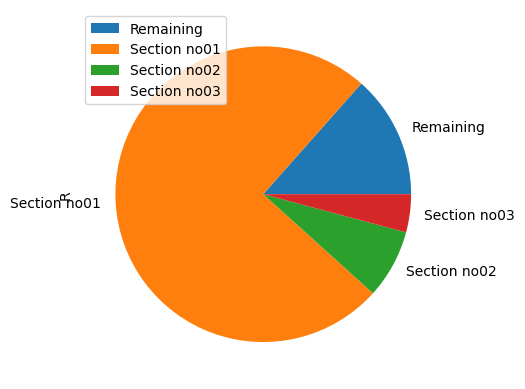

In [111]:
VocabStatsMerge.groupby(['BiblicalHebrewVocabularyBuilderSection']).sum().plot(kind='pie', y='R')